# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [10]:
df=pd.read_excel('avg1.xlsx')

for loop to take only the average of the avlues between the  zero values(nigths) and append to a list

In [14]:
counter=0
total=0
g_avg=[]
output=[]
for x in df['G']:
    if x !=0:
        counter+=1
        total+=x
    if(counter>0 and x==0):
        z=total/counter
        g_avg.append(z)
        counter=0
        
        total=0
print(g_avg)
#print(output)

[123.10163512678831, 0.4503529252941176, 0.0225, 0.6792784500000001, 0.23539985999999963, 0.30621957499999997, 0.133667, 0.6262518333333331, 0.21037271999999999, 0.08400013333333334, 0.107833, 0.07141665, 0.08810351499999951, 0.13331054999999994, 172.79299511249997, 0.07899999999999996, 0.09150015, 0.40908349999999977, 0.05158335, 0.07429495, 0.51385584, 0.0333333, 0.0103333, 0.08699984999999945, 156.5774977480719, 0.3141511111111111, 0.164167, 0.0928333, 108.57877464961618, 0.11474999999999999, 0.184887, 0.488583, 0.0181667, 0.1844614999999995, 0.08816649999999951, 152.09884130548312, 0.0693333, 0.0201667, 256.1613370080562, 0.152667, 1.0282494, 0.30505556666666667, 0.06444443333333333, 0.00383333, 0.00266667, 142.2899403453264, 0.48761971428571427, 0.203729, 0.0223333, 278.2466619553219, 0.08183335, 0.00833333, 0.0443333, 0.14620816749999976, 0.05074999999999995, 221.44722002480327, 0.08075, 0.00583333, 197.54469963399478, 182.50715306544487, 149.92731524242419, 0.021294549999999975,

In [15]:
counter=0
total=0
p_avg=[]
output=[]
for x in df['P']:
    if x !=0:
        counter+=1
        total+=x
    if(counter>0 and x==0):
        z=total/counter
        p_avg.append(z)
        counter=0
        
        total=0
print(p_avg)
#print(output)

[270.9331215588163, 1.0054234411764702, 0.0518689, 1.5005528000000001, 0.51337092, 0.6731372499999999, 0.303925, 1.3571121666666668, 0.4751230999999999, 0.18149366666666666, 0.248421, 0.15088055, 0.1907279, 0.279026, 379.8945344595355, 0.1784385, 0.198566, 0.871084, 0.11552319999999999, 0.165824475, 1.1178472, 0.0707185, 0.0225682, 0.186691, 343.7198161721082, 0.6960438222222223, 0.376147, 0.210012, 238.9717196240407, 0.2627515, 0.40978800000000004, 1.101056, 0.0395954, 0.39985350000000003, 0.19916755, 334.2569320796351, 0.15408, 0.0447707, 563.6435114667521, 0.328979, 2.2538938000000006, 0.6732755333333333, 0.13827743333333334, 0.00874993, 0.00570703, 313.61707973674766, 1.0860677142857142, 0.470402, 0.0482091, 551.113736576872, 0.1580195, 0.0162458, 0.0864251, 0.28985727, 0.1045999, 438.95296753412117, 0.1535936, 0.0113856, 390.7921295132277, 362.3446104175395, 296.7311761459816, 0.041319175, 292.1297328522996, 0.51500825, 0.052128549999999996, 291.40992074044755, 1.1906144166666666,

View correlation between the irradiance and power

Text(0, 0.5, 'power')

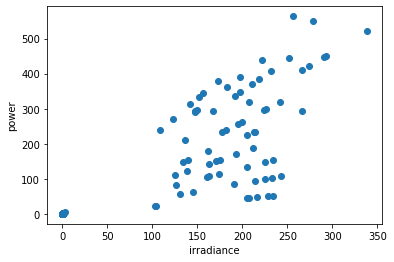

In [21]:
plt.scatter(g_avg,p_avg)
plt.xlabel('irradiance')
plt.ylabel('power')

to add the new columns to the dataframe, we need to convert the lists to a pandas series so that the empty rows will be 
filled as 'NAN'

In [31]:
df['g_avg'] = pd.Series(g_avg)
df['p_avg'] = pd.Series(p_avg)

Drop the original G and P

In [33]:
df.drop(columns=['G','P'])

,g_avg,p_avg
0,123.101635,270.933122
1,0.450353,1.005423
2,0.022500,0.051869
3,0.679278,1.500553
4,0.235400,0.513371
...,...,...
97195,NaN,NaN
97196,NaN,NaN
97197,NaN,NaN
97198,NaN,NaN


Deleteing teh Nan rows

In [34]:
df.dropna()

,G,P,g_avg,p_avg
0,0.000,0.000,123.101635,270.933122
1,0.000,0.000,0.450353,1.005423
2,0.000,0.000,0.022500,0.051869
3,0.000,0.000,0.679278,1.500553
4,0.000,0.000,0.235400,0.513371
...,...,...,...,...
448,127.743,280.645,0.041000,0.008771
449,128.057,268.312,233.574869,51.457698
450,128.710,291.270,0.107667,0.022728
451,129.267,283.488,0.452350,0.098688


Carrying out the K-means model testing

In [22]:
km=KMeans(n_clusters=10)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
y_pred=km.fit_predict(df)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
df['cluster']=y_pred
df.head()

,G,P,g_avg,p_avg,cluster
0,0.0,0.0,123.101635,270.933122,0
1,0.0,0.0,0.450353,1.005423,0
2,0.0,0.0,0.022500,0.051869,0
3,0.0,0.0,0.679278,1.500553,0
4,0.0,0.0,0.235400,0.513371,0


Text(0, 0.5, 'P')

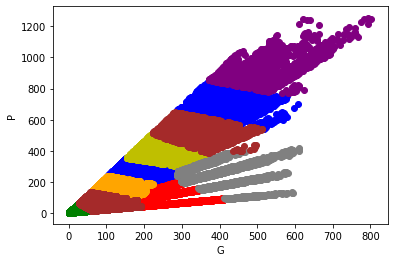

In [36]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='b')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='y')
plt.scatter(df4.G,df4.P, color='r')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='brown')
plt.scatter(df9.G,df9.P, color='brown')

plt.xlabel('G')
plt.ylabel('P')